Faturamento de Janeiro por Loja (em R$):
                 Loja 1       Loja 2       Loja 3       Loja 4
Mes_Ano                                                       
2020-01-01 R$ 46,450.16 R$ 43,731.79 R$ 33,433.43 R$ 27,125.08
2021-01-01 R$ 35,926.46 R$ 40,970.02 R$ 31,838.59 R$ 33,050.57
2022-01-01 R$ 36,862.63 R$ 57,133.00 R$ 57,256.82 R$ 48,183.50
2023-01-01 R$ 40,631.79 R$ 35,365.42 R$ 31,538.81 R$ 27,807.81


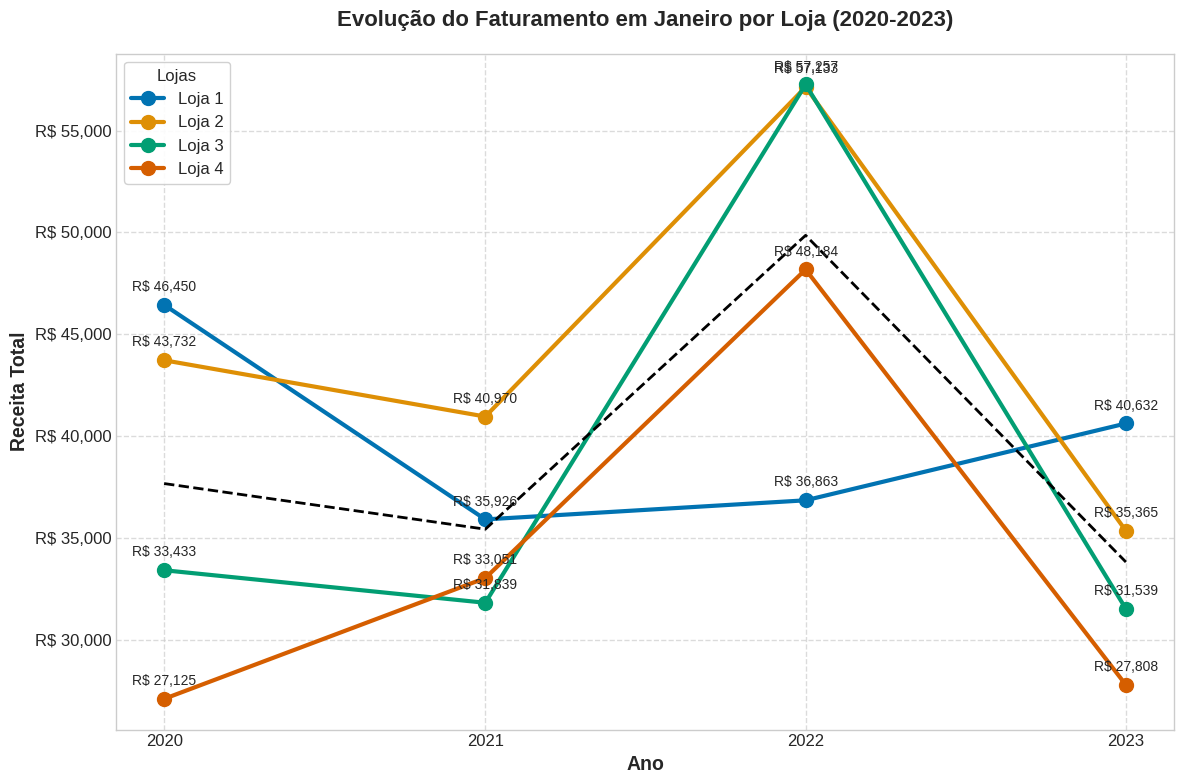

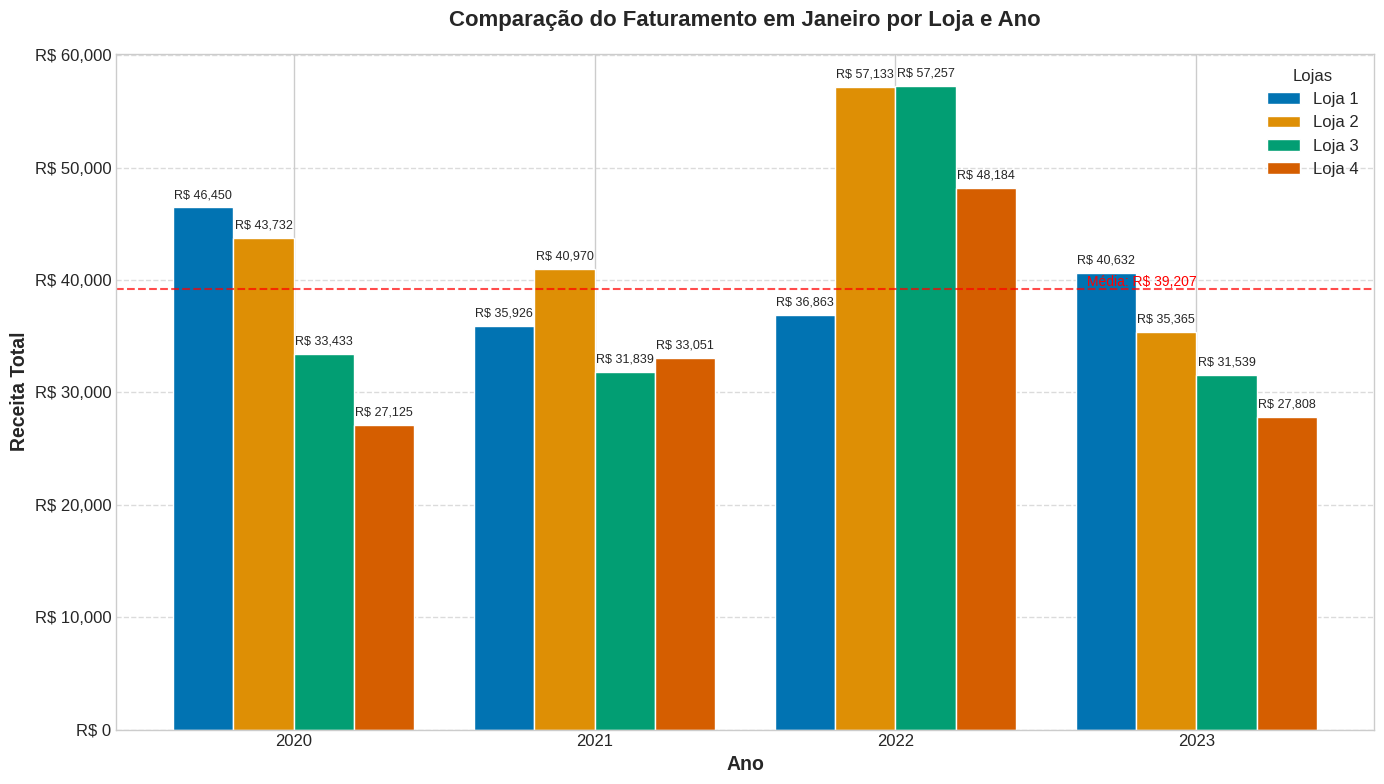

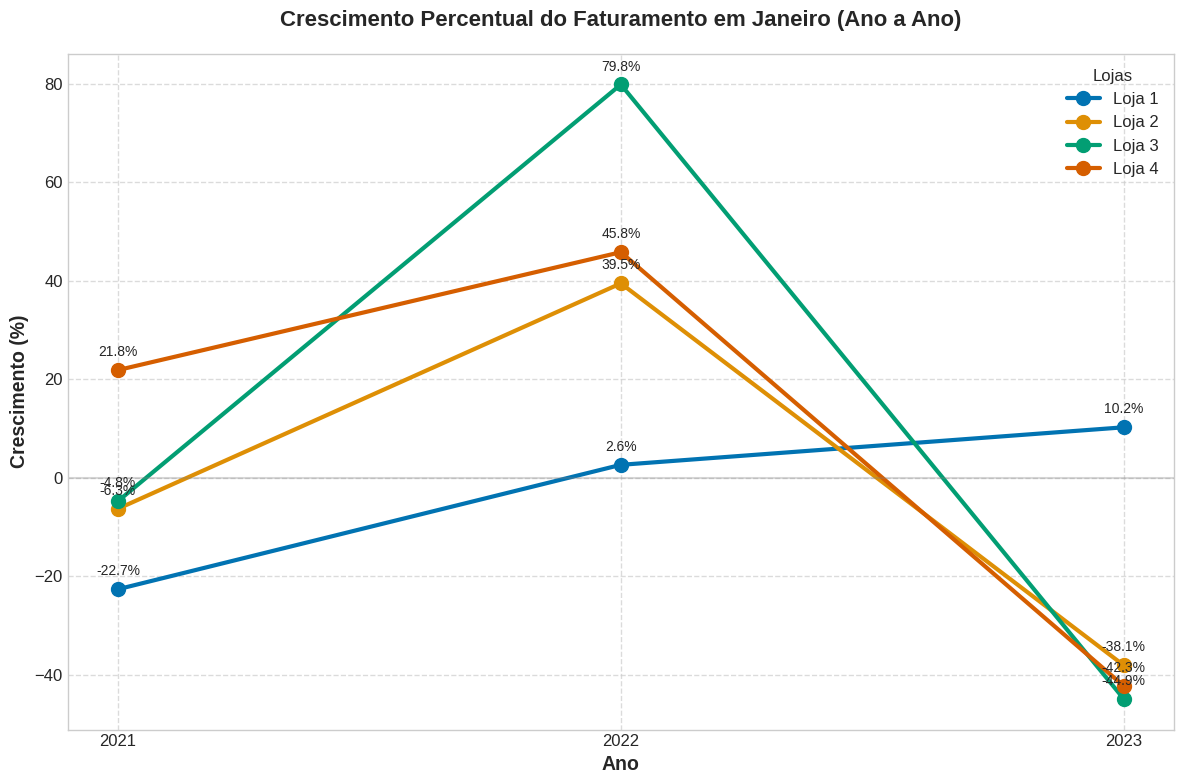

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# URLs das lojas
target_urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Função para formatar valores como moeda
def currency_formatter(x, pos):
    return f'R$ {x:,.0f}'

# Dicionário para armazenar dados de janeiro
jan_data = {}

# Processa cada loja
for name, url in target_urls.items():
    # Carrega dados
    df = pd.read_csv(url)
    
    # Conversões de tipos
    df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True, errors='coerce')
    df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')
    df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
    
    # Cálculo faturamento
    df['Faturamento'] = df['Preço'] + df['Frete']
    
    # Extrai mês e ano
    df['Mes_Ano'] = df['Data da Compra'].dt.to_period('M')
    
    # Agrega mensal
    mensal = df.groupby('Mes_Ano')['Faturamento'].sum()
    
    # Filtra janeiro de cada ano
    jan = mensal[mensal.index.month == 1]
    jan_data[name] = jan

# Combinando em DataFrame
df_jan = pd.DataFrame(jan_data)

# Ajusta índice para timestamp
df_jan.index = df_jan.index.to_timestamp()

# Exibe tabela de faturamento de janeiro formatada
print("Faturamento de Janeiro por Loja (em R$):")
pd.options.display.float_format = 'R$ {:,.2f}'.format
print(df_jan)

# Criando uma figura maior
plt.figure(figsize=(12, 8))

# Gráfico principal de linhas
for loja in df_jan.columns:
    plt.plot(df_jan.index, df_jan[loja], marker='o', markersize=10, linewidth=3, label=loja)

# Adiciona anotações de valores
for loja in df_jan.columns:
    for x, y in zip(df_jan.index, df_jan[loja]):
        plt.annotate(f'R$ {y:,.0f}', 
                     (x, y),
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center',
                     fontsize=10)

# Formatação do gráfico
plt.title('Evolução do Faturamento em Janeiro por Loja (2020-2023)', fontweight='bold', pad=20)
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Receita Total', fontweight='bold')

# Formatação dos eixos
plt.xticks(df_jan.index, [d.strftime('%Y') for d in df_jan.index])
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Ajustes visuais
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Lojas', loc='upper left', frameon=True, facecolor='white', framealpha=0.9)

# Ajustes finais
plt.tight_layout()

# Adiciona média de todas as lojas como linha pontilhada
avg_values = df_jan.mean(axis=1)
plt.plot(df_jan.index, avg_values, linestyle='--', color='black', linewidth=2, label='Média geral')

# Salva a imagem em alta resolução
plt.savefig('janeiro_por_loja.png', dpi=300, bbox_inches='tight')

# Mostra o gráfico
plt.show()

# Gráfico adicional: Comparação lado a lado
plt.figure(figsize=(14, 8))

# Prepare dados para gráfico de barras
x = np.arange(len(df_jan.index))  # posições no eixo x
width = 0.2  # largura das barras
years = [d.strftime('%Y') for d in df_jan.index]

# Plota barras para cada loja
for i, loja in enumerate(df_jan.columns):
    pos = x + (i - 1.5) * width
    bars = plt.bar(pos, df_jan[loja], width, label=loja)
    
    # Adiciona rótulos acima de cada barra
    for bar, value in zip(bars, df_jan[loja]):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + df_jan.values.max()*0.01,
                f'R$ {value:,.0f}', ha='center', va='bottom', rotation=0, fontsize=9)

# Formatação do gráfico
plt.title('Comparação do Faturamento em Janeiro por Loja e Ano', fontweight='bold', pad=20)
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Receita Total', fontweight='bold')
plt.xticks(x, years)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Ajustes visuais
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Lojas')

# Adiciona uma linha horizontal com a média geral
plt.axhline(y=df_jan.values.mean(), color='red', linestyle='--', alpha=0.7, label='Média geral')
plt.text(len(years)-1, df_jan.values.mean(), f'Média: R$ {df_jan.values.mean():,.0f}', 
         fontsize=10, va='bottom', ha='right', color='red')

plt.tight_layout()
plt.savefig('janeiro_comparativo_barras.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico de crescimento percentual ano a ano
plt.figure(figsize=(12, 8))

# Calcular crescimento percentual
pct_change = df_jan.pct_change() * 100

# Plotar o crescimento percentual
for loja in pct_change.columns:
    plt.plot(pct_change.index[1:], pct_change[loja][1:], marker='o', markersize=10, linewidth=3, label=loja)
    
    # Adiciona anotações de percentual
    for x, y in zip(pct_change.index[1:], pct_change[loja][1:]):
        plt.annotate(f'{y:.1f}%', 
                     (x, y),
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center',
                     fontsize=10)

# Linha de 0%
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

plt.title('Crescimento Percentual do Faturamento em Janeiro (Ano a Ano)', fontweight='bold', pad=20)
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Crescimento (%)', fontweight='bold')
plt.xticks(pct_change.index[1:], [d.strftime('%Y') for d in pct_change.index[1:]])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Lojas', loc='best')
plt.tight_layout()
plt.savefig('janeiro_crescimento_percentual.png', dpi=300, bbox_inches='tight')
plt.show()

📌 Top 5 Categorias por Faturamento:
 Categoria do Produto    Faturamento
          eletronicos R$2,332,048.08
     eletrodomesticos R$1,860,198.66
               moveis R$1,064,149.77
instrumentos musicais   R$489,701.48
      esporte e lazer   R$200,891.94


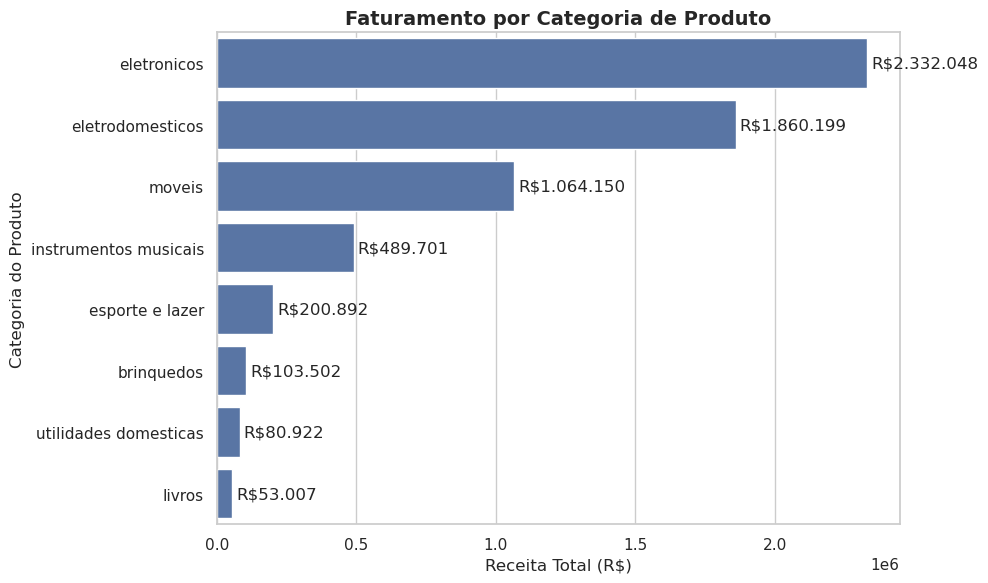

In [43]:

sns.set(style="whitegrid")  # Mantém um estilo limpo sem especificar palette

# URLs das bases de dados
URLS = [
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv',
    'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv'
]

def carregar_dados(urls):
    """Carrega, limpa e combina os dados de todas as lojas."""
    dfs = []
    for url in urls:
        df = pd.read_csv(url)
        df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')
        df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
        df['Faturamento'] = df['Preço'] + df['Frete']
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def faturamento_por_categoria(df):
    """Calcula o faturamento total por categoria."""
    agrupado = df.groupby('Categoria do Produto')['Faturamento'].sum().reset_index()
    return agrupado.sort_values(by='Faturamento', ascending=False)

def plotar_vendas_categoria(df):
    """Gera um gráfico de barras com as vendas por categoria."""
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=df, x='Faturamento', y='Categoria do Produto')  # removido palette
    plt.title('Faturamento por Categoria de Produto', fontsize=14, weight='bold')
    plt.xlabel('Receita Total (R$)')
    plt.ylabel('Categoria do Produto')
    
    # Rótulos nas barras com formatação monetária
    for i in ax.containers:
        ax.bar_label(i, labels=[f'R${v:,.0f}'.replace(",", ".") for v in i.datavalues], label_type='edge', padding=3)
    
    plt.tight_layout()
    plt.savefig('vendas_por_categoria.png', dpi=300)
    plt.show()

# Execução principal
if __name__ == '__main__':
    dados = carregar_dados(URLS)
    vendas_categoria = faturamento_por_categoria(dados)

    # Imprime top 5 com valores formatados
    top5_formatado = vendas_categoria.head().copy()
    top5_formatado['Faturamento'] = top5_formatado['Faturamento'].map('R${:,.2f}'.format)
    
    print("📌 Top 5 Categorias por Faturamento:")
    print(top5_formatado.to_string(index=False))

    plotar_vendas_categoria(vendas_categoria)


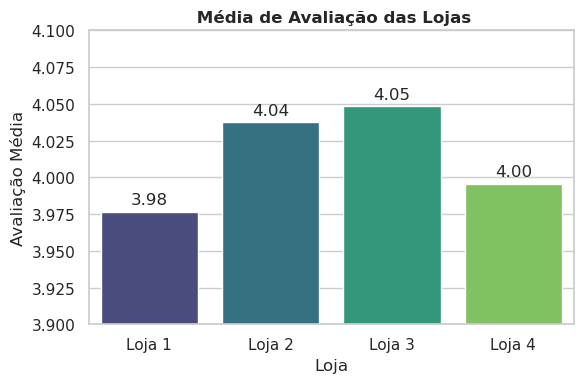

In [46]:

# Dados de média de avaliação por loja
df_ratings = pd.DataFrame([
    {'Loja': 'Loja 1', 'Média Avaliação': 3.976685036},
    {'Loja': 'Loja 2', 'Média Avaliação': 4.0373039423},
    {'Loja': 'Loja 3', 'Média Avaliação': 4.0483255617},
    {'Loja': 'Loja 4', 'Média Avaliação': 3.9957591179}
])

# Ajustar fonte para evitar erro com o caractere estrela
plt.rcParams['font.family'] = 'Noto Sans'

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Usar hue para aplicar paleta corretamente (e evitar FutureWarning)
barplot = sns.barplot(
    x='Loja', y='Média Avaliação', hue='Loja',
    data=df_ratings, palette='viridis', dodge=False, legend=False
)

# Adiciona rótulos nas barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3)

# Limites do eixo y
plt.ylim(3.9, 4.1)

# Títulos e eixos
plt.title(' Média de Avaliação das Lojas', fontsize=12, weight='bold')
plt.ylabel('Avaliação Média')
plt.xlabel('Loja')

plt.tight_layout()
plt.savefig('media_avaliacao_lojas.png')
plt.show()



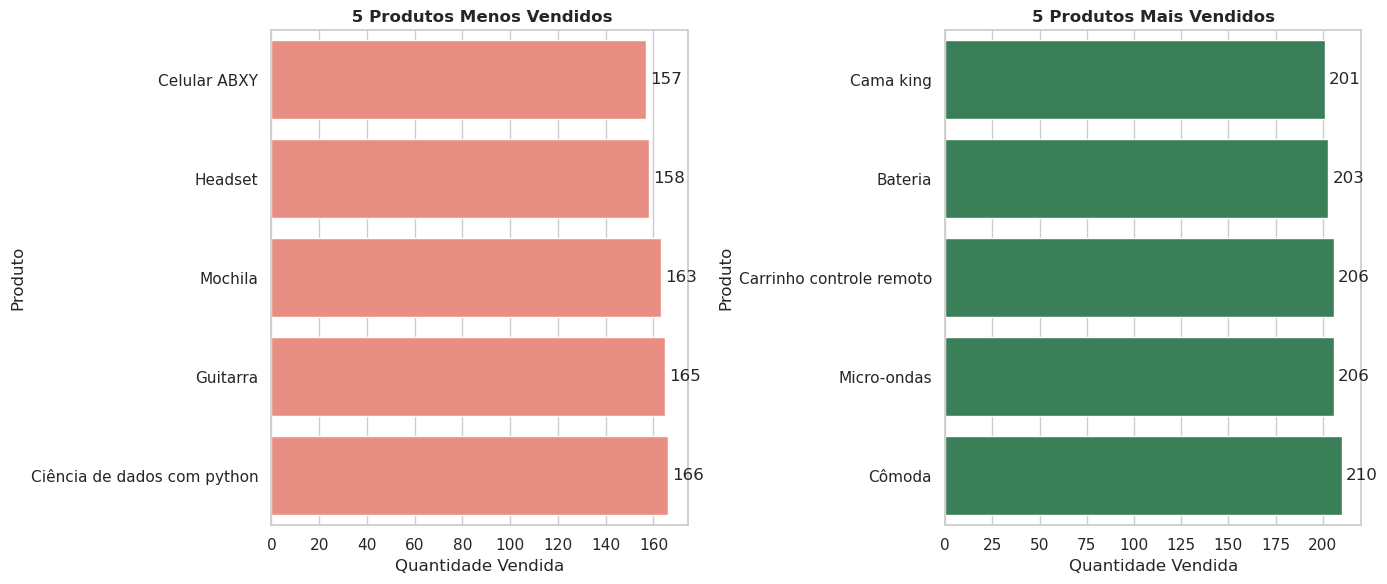

In [47]:
# Estilo visual
sns.set(style="whitegrid")

# Verifica se df_all já existe
try:
    df_all
except NameError:
    print("🔄 Carregando dados das lojas...")
    urls = [
        "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
        "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
        "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
        "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
    ]
    df_all = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)

# Conta vendas por produto
vendas_por_produto = df_all['Produto'].value_counts().sort_values()

# Top 5 e bottom 5
top5 = vendas_por_produto.tail(5)
bottom5 = vendas_por_produto.head(5)

# Função para adicionar rótulos nas barras
def adicionar_rotulos(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Plotagem
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico dos 5 menos vendidos
sns.barplot(x=bottom5.values, y=bottom5.index, ax=axes[0], color='salmon')
axes[0].set_title(' 5 Produtos Menos Vendidos', fontsize=12, weight='bold')
axes[0].set_xlabel('Quantidade Vendida')
axes[0].set_ylabel('Produto')
adicionar_rotulos(axes[0])

# Gráfico dos 5 mais vendidos
sns.barplot(x=top5.values, y=top5.index, ax=axes[1], color='seagreen')
axes[1].set_title('5 Produtos Mais Vendidos', fontsize=12, weight='bold')
axes[1].set_xlabel('Quantidade Vendida')
axes[1].set_ylabel('Produto')
adicionar_rotulos(axes[1])

plt.tight_layout()
plt.savefig('top_bottom5_vendas.png')
plt.show()


     Loja  Frete Médio
0  Loja 1     R$ 34.69
1  Loja 2     R$ 33.62
2  Loja 3     R$ 33.07
3  Loja 4     R$ 31.28


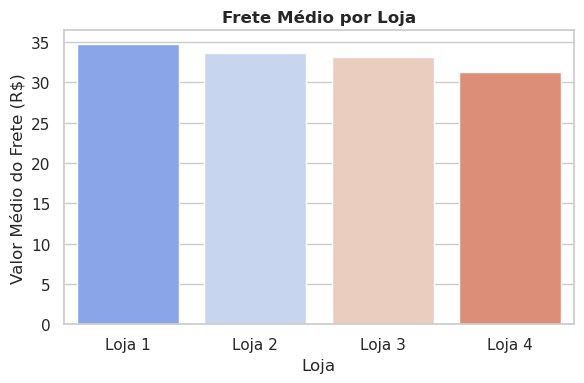

In [48]:

# URLs das lojas
dados_urls = {
    'Loja 1': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv',
    'Loja 2': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv',
    'Loja 3': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv',
    'Loja 4': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv'
}

# Lista para armazenar os valores médios do frete
medias_frete = []
for loja, url in dados_urls.items():
    df = pd.read_csv(url)

    # Converter a coluna 'Frete' para numérico, ignorando erros
    df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')

    # Calcular a média do frete
    media = df['Frete'].mean()
    medias_frete.append({'Loja': loja, 'Frete Médio': media})

# Criar DataFrame de resultado
df_frete = pd.DataFrame(medias_frete)
print(df_frete)

# Configurar estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Criar gráfico de barras, garantindo a correta atribuição de 'hue' para evitar avisos futuros
sns.barplot(data=df_frete, x='Loja', y='Frete Médio', hue='Loja', palette='coolwarm', dodge=False, legend=False)

# Adicionar título e rótulos
plt.title('Frete Médio por Loja', fontsize=12, weight='bold')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')

plt.tight_layout()
plt.savefig('frete_medio_lojas.png')
plt.show()
